# UTS KSI
# 119140031_Muhammad A.M Hikar Syahrial_RD

In [ ]:
# installing required library
!pip install tweepy

In [ ]:
# importing libraries
import tweepy
import configparser
import pandas as pd
import re
import itertools as iter
import collections
import matplotlib.pyplot as plt

In [ ]:
# configs
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [ ]:
# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# searching keyword and saving it to csv file
columns = ['Time', 'User', 'Tweet', 'Retweet']
data = []

for tweet in tweepy.Cursor(api.search, q = 'el classico',
                           lang = 'en', 
                           since = '2022-03-21').items(400):
    data.append([tweet.created_at, tweet.user.screen_name, tweet.text, tweet.retweet_count])

df1 = pd.DataFrame(data, columns = columns)
df1.to_csv('classico.csv')

# presenting number of users that tweeted "el classico"

In [ ]:
# formatting tweet time into yy-mm-dd-hh 
time = df1['Time']
date = time.dt.strftime('%m-%d')

date.value_counts()

03-25    181
03-26    112
03-27     93
03-28     14
Name: Time, dtype: int64

Text(0.5, 1.0, 'number of tweets')

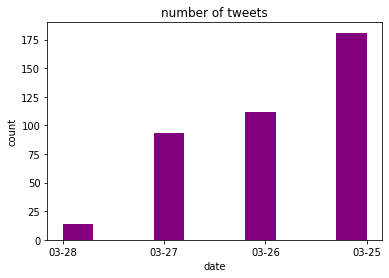

In [ ]:
plt.hist(date, color = 'purple')
plt.xlabel('date')
plt.ylabel('count')
plt.title('number of tweets')

# presenting number of retweets with a grapgh

Text(0.5, 1.0, 'number of retweet')

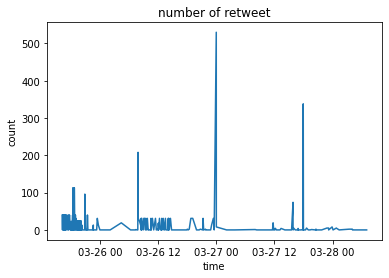

In [ ]:
plt.plot(time, df1['Retweet'])
plt.xlabel('time')
plt.ylabel('count')
plt.title('number of retweet')

# presenting common words from tweets with a graph

In [ ]:
# making a list from keyword search
search_term = 'el classico'

list_tweet = tweepy.Cursor(api.search,
                           q = search_term,
                           lang = 'en',
                           since = '2022-03-21').items(400)

all_tweet = [tweet.text for tweet in list_tweet]
all_tweet [:15]

['@MixedMa30511035 @KBlancos9 Oh right that’s what your referring to 😭😭😭 yeah we have a wage structure unlike the el… https://t.co/bPm89L3PX3',
 '@KaizerRMA @bizimdirCEO how many El classico has Pedri played..',
 'Baba did this shit in one el classico and umtiti (or dani) screamed at him to get up. https://t.co/bgPoIT6tcO',
 '@suppandiiii U are fast 😂😂😂this pic will become such a footy meme - too bad it didn’t excist when we played el Classico 😂',
 '@JesusRoIe Broo I used to think the same.. I saw the fkin el classico dis month... The amout of maturity Pedri has… https://t.co/SjkuLjH5bM',
 'RT @MeseeksMobileGO: GRAND FINALS STARTING NOW\nhttps://t.co/3uNllIQLpE\n\nMaybe not a Eleventy vs Zygnus El Classico, but still a classic no…',
 'RT @MeseeksMobileGO: GRAND FINALS STARTING NOW\nhttps://t.co/3uNllIQLpE\n\nMaybe not a Eleventy vs Zygnus El Classico, but still a classic no…',
 'GRAND FINALS STARTING NOW\nhttps://t.co/3uNllIQLpE\n\nMaybe not a Eleventy vs Zygnus El Classico, but still 

In [ ]:
# removing url from tweet list
def remove(txt):
  return re.sub("[^0-9A-za-z \t]|(\w+:\/\/\S+)","",txt)

tweet_remove_url = [remove(list_tweet) for list_tweet in all_tweet]
tweet_remove_url[:15]

['MixedMa30511035 KBlancos9 Oh right thats what your referring to  yeah we have a wage structure unlike the el ',
 'KaizerRMA bizimdirCEO how many El classico has Pedri played',
 'Baba did this shit in one el classico and umtiti or dani screamed at him to get up ',
 'suppandiiii U are fast this pic will become such a footy meme  too bad it didnt excist when we played el Classico ',
 'JesusRoIe Broo I used to think the same I saw the fkin el classico dis month The amout of maturity Pedri has ',
 'RT MeseeksMobileGO GRAND FINALS STARTING NOWMaybe not a Eleventy vs Zygnus El Classico but still a classic no',
 'RT MeseeksMobileGO GRAND FINALS STARTING NOWMaybe not a Eleventy vs Zygnus El Classico but still a classic no',
 'GRAND FINALS STARTING NOWMaybe not a Eleventy vs Zygnus El Classico but still a classic ',
 'RT pulse_fc The Pulse fell 10 in a hardfought game for the Rowland Final The El Classico of the DMVCongratulations to ChristosFC',
 'LaPulgafan10 theMadridZone diarioas People li

In [ ]:
# splitting sentences
word_in_tweet = [list_tweet.lower().split() for list_tweet in tweet_remove_url]
word_in_tweet[:1]

[['mixedma30511035',
  'kblancos9',
  'oh',
  'right',
  'thats',
  'what',
  'your',
  'referring',
  'to',
  'yeah',
  'we',
  'have',
  'a',
  'wage',
  'structure',
  'unlike',
  'the',
  'el']]

In [ ]:
# counting common words in list
list_tweet_no_url = list(iter.chain(*word_in_tweet))
count_word_list_tweet = collections.Counter(list_tweet_no_url)
count_word_list_tweet.most_common(15)

[('el', 355),
 ('classico', 332),
 ('the', 242),
 ('rt', 167),
 ('is', 117),
 ('a', 111),
 ('and', 95),
 ('of', 87),
 ('in', 75),
 ('ghana', 70),
 ('to', 59),
 ('nigeria', 59),
 ('but', 56),
 ('whos', 52),
 ('africa', 51)]

In [ ]:
# saving common words to a csv file
df2 = pd.DataFrame(count_word_list_tweet.most_common(15), columns = ['words','count'])
df2.to_csv('common-words.csv')

df2

,words,count
0,el,355
1,classico,332
2,the,242
3,rt,167
4,is,117
5,a,111
6,and,95
7,of,87
8,in,75
9,ghana,70


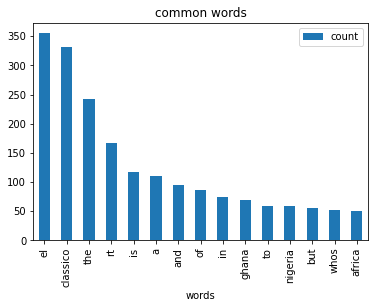

In [ ]:
# presenting common word data as a bar graph
common_word = pd.read_csv('common-words.csv')

common_word.plot(kind = 'bar', x = 'words', y = 'count', title = 'common words')

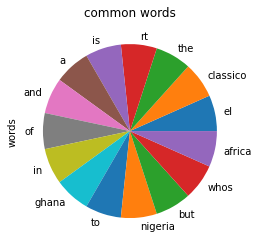

In [ ]:
# presenting data as a pie chart
common_word['words'].value_counts().plot(kind = 'pie', title = 'common words')